In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('mydf_final.csv')

In [3]:
df.head()

,sex,patient_type,intubed,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,cardiovascular,obesity,renal_chronic,tobacco,icu,days,fatal
0,1,0,0.0,0.0,0.450000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.071429,0
1,0,0,0.0,1.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0
2,1,0,0.0,0.0,0.500000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,1
3,0,0,0.0,1.0,0.391667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1
4,0,0,0.0,0.0,0.525000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.128571,0


In [8]:
X = df.drop(columns = ['fatal'], axis = 1)
y = df.filter(['fatal'], axis = 1)
y.fatal = y.fatal.astype('category')

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# y_train=y_train.squeeze()
# y_train.squeeze()

0         0
1         0
2         1
3         1
4         0
         ..
114503    0
114504    0
114505    1
114506    0
114507    0
Name: fatal, Length: 114508, dtype: category
Categories (2, int64): [0, 1]

<ipython-input-9-95eaacdac54d>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  KNN.fit(trainX, trainy)


Best Threshold=0.300000, F-Score=0.574


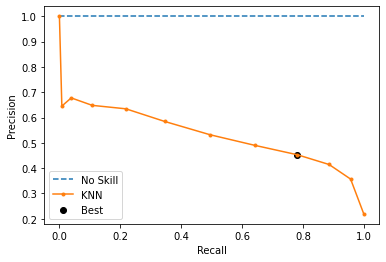

In [9]:
# optimal threshold for precision-recall curve with logistic regression model
from numpy import argmax
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)
trainy.squeeze()
# fit a model
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(trainX, trainy)

# predict probabilities
yhat = KNN.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# calculate roc curves
precision, recall, thresholds = precision_recall_curve(testy, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model

no_skill = len(testy[testy==1]) / len(testy)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='KNN')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
neigh = KNeighborsClassifier(n_neighbors=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
neigh.fit(X_train, y_train)
knnprediction = np.where(neigh.predict_proba(X_test)[:,1] > 0.3, 1, 0)
accuracy = accuracy_score(knnprediction, y_test)
print(accuracy)
print(confusion_matrix(y_test, knnprediction))

<ipython-input-11-514a730b42c4>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh.fit(X_train, y_train)


0.7729455942712427
[[21688  5132]
 [ 2668  4865]]


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
neigh = KNeighborsClassifier(n_neighbors=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
neigh.fit(X_train, y_train)
knnprediction = np.where(neigh.predict_proba(X_test)[:,1] > 0.5, 1, 0)
accuracy = accuracy_score(knnprediction, y_test)
print(accuracy)
print(confusion_matrix(y_test, knnprediction))

<ipython-input-12-8ed2948d2a31>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh.fit(X_train, y_train)


0.8003376706546735
[[24933  1887]
 [ 4972  2561]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
y_train.squeeze()
knn=KNeighborsClassifier() 
knn_params={'n_neighbors':[i+1 for i in range(10, 16)]}
gridsearch_knn = GridSearchCV(knn, knn_params, cv=10,refit=True)
gridsearch_knn.fit(X_train, y_train)
knn_best=gridsearch_knn.best_estimator_
knn_best.fit(X_train, y_train)
print(gridsearch_knn.best_params_)